In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
from torchvision.models import resnet18

In [3]:
model = resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 2)
model = model.to(device)

epochs = 5
learning_rate = 0.0003
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
creterion = nn.CrossEntropyLoss()

d:\Anconda\envs\DL\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anconda\envs\DL\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
import gen_train_test_data
trainloader = gen_train_test_data.get_trainloader('data_train/')
testloader = gen_train_test_data.get_testloader('data_test')

losses = []
accuracies = []
precisions = []
recalls = []
F1_scores = []
turns = 0

for epoch in range(epochs):
    for x, y in trainloader:
        inputs = x.to(device)
        labels = y.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = creterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        with torch.no_grad():
            turns += 1
            _, predicted = torch.max(outputs.cpu(), dim=1)
            labels = labels.cpu()
            tp = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
            tn = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
            fp = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
            fn = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
            recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            F1_scores.append((2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0)
            print(f'turns:{turns}, loss:{loss.item()}')

turns:1, loss:0.9640148282051086
turns:2, loss:0.30197271704673767
turns:3, loss:0.2196820080280304
turns:4, loss:0.14132878184318542
turns:5, loss:0.14881350100040436
turns:6, loss:0.43850040435791016
turns:7, loss:0.013139215297996998
turns:8, loss:0.05641889572143555
turns:9, loss:0.019418995827436447
turns:10, loss:0.0783429965376854
turns:11, loss:0.03178256005048752
turns:12, loss:0.17251773178577423
turns:13, loss:0.03543533757328987
turns:14, loss:0.021517354995012283
turns:15, loss:1.2826554775238037
turns:16, loss:0.11400289833545685
turns:17, loss:0.036721665412187576
turns:18, loss:0.18062810599803925
turns:19, loss:0.0026137633249163628
turns:20, loss:0.07088311016559601
turns:21, loss:0.0009866812033578753
turns:22, loss:0.00802508182823658
turns:23, loss:0.05248292535543442
turns:24, loss:0.22083452343940735
turns:25, loss:0.025283444672822952
turns:26, loss:0.013664399273693562
turns:27, loss:0.014901040121912956
turns:28, loss:0.9395381212234497
turns:29, loss:0.035736

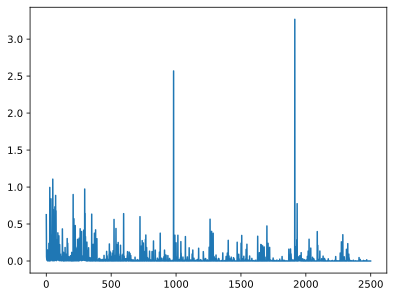

In [ ]:
plt.plot(range(len(losses)), losses)

训练集精度: 100.0%


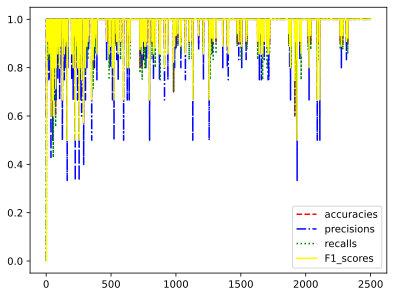

In [ ]:
lens = len(accuracies)+1
plt.plot(range(1, lens), accuracies, color='red', linestyle='--', label='accuracies')
plt.plot(range(1, lens), precisions, color='blue', linestyle='-.', label='precisions')
plt.plot(range(1, lens), recalls, color='green', linestyle=':', label='recalls')
plt.plot(range(1, lens), F1_scores, color='yellow', linestyle='-', label='F1_scores')
plt.legend()

print(f'训练集精度: {100*accuracies[len(accuracies)-1]}%')

In [ ]:
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        labels = labels.cpu()
        tp += torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
        tn += torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
        fp += torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
        fn += torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
print(f'测试集准确率: {100*accuracy}%')
print(f'测试集精确率: {100*precision}%')
print(f'测试集召回率: {100*recall}%')
print(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}')

测试集准确率: 100.0%
测试集精确率: 100.0%
测试集召回率: 100.0%
测试集F1值: 1.0


In [ ]:
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        for i in range(len(predicted)):
            print(f'predict:{predicted[i]}, label:{labels[i]}')

predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:1, label:1
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:1, label:1
predict:1, label:1
predict:1, label:1
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:1, label:1
predict:0, label:0
predict:0, label:0
predict:1, label:1
predict:0, l

In [ ]:
torch.save({'model': model.state_dict()}, './mymodel/ResNet18_2/100%.pth')